The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')
The gender with the most Nobel laureates is: Male
The country with the most Nobel laureates is: United States of America
   year    category  ... death_country    USA
0  1901   Chemistry  ...       Germany  False
1  1901  Literature  ...        France  False
2  1901    Medicine  ...       Germany  False
3  1901       Peace  ...   Switzerland  False
4  1901  

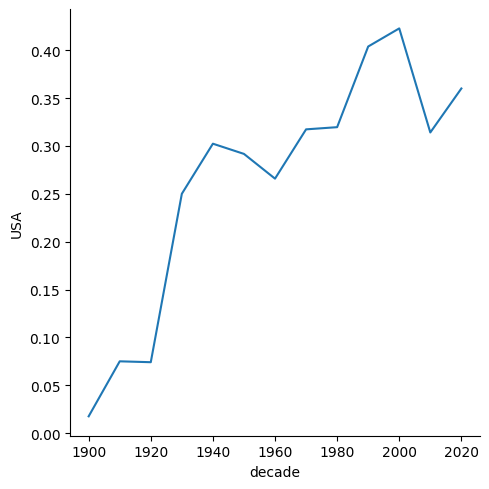

   year    category  ... decade Female
0  1901   Chemistry  ...   1900  False
1  1901  Literature  ...   1900  False
2  1901    Medicine  ...   1900  False
3  1901       Peace  ...   1900  False
4  1901       Peace  ...   1900  False

[5 rows x 21 columns]
    decade    category    Female
0     1900   Chemistry  0.000000
1     1900  Literature  0.100000
2     1900    Medicine  0.000000
3     1900       Peace  0.071429
4     1900     Physics  0.076923
..     ...         ...       ...
67    2020   Economics  0.111111
68    2020  Literature  0.500000
69    2020    Medicine  0.125000
70    2020       Peace  0.285714
71    2020     Physics  0.166667

[72 rows x 3 columns]
{2020: 'Literature'}


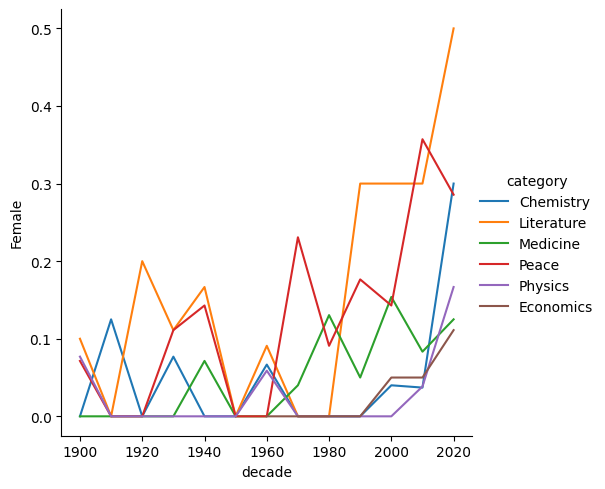

     year    category  ... decade Female
19   1903     Physics  ...   1900   True
29   1905       Peace  ...   1900   True
51   1909  Literature  ...   1900   True
62   1911   Chemistry  ...   1910   True
128  1926  Literature  ...   1920   True
..    ...         ...  ...    ...    ...
982  2022  Literature  ...   2020   True
989  2023    Medicine  ...   2020   True
993  2023     Physics  ...   2020   True
998  2023       Peace  ...   2020   True
999  2023   Economics  ...   2020   True

[65 rows x 21 columns]
The name of the first female laureate is Marie Curie, née Sklodowska
The category of the first female laureate is Physics
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, n

In [20]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
nobel = pd.read_csv('data/nobel.csv')
print(nobel.head())
print(nobel.columns)

# Identify the gender with the most Nobel laureates
top_gender = nobel['sex'].value_counts().index[0]
print('The gender with the most Nobel laureates is:', top_gender)

# Identify the country with the most Nobel laureates
top_country = nobel['birth_country'].value_counts().index[0]
print('The country with the most Nobel laureates is:', top_country)

# Identify the decade with the highest proportion of US-born winners
nobel['USA'] = nobel['birth_country'] == 'United States of America'
print(nobel.head())

nobel['decade'] = np.floor(nobel['year'] / 10) * 10
nobel['decade'] = nobel['decade'].astype(int)

# Calculate the mean proportion of US-born winners by decade
mean_decade_usa = nobel.groupby('decade', as_index=False)['USA'].mean()
max_decade_usa = mean_decade_usa[mean_decade_usa['USA'] == mean_decade_usa['USA'].max()]['decade'].values[0]
print('The decade with the highest proportion of laureates from the USA is:', max_decade_usa)

# Plot the proportion of US-born winners by decade
sns.relplot(data=mean_decade_usa, x='decade', y='USA', kind='line')
plt.show()

# Identify the decade and category with the highest proportion of female laureates
nobel['Female'] = nobel['sex'] == 'Female'
print(nobel.head())

max_female = nobel.groupby(['decade', 'category'], as_index=False)['Female'].mean()
print(max_female)

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = max_female[max_female['Female'] == max_female['Female'].max()][['decade', 'category']]

max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(max_female_dict)

# Plot the proportion of female winners by decade and category
sns.relplot(x='decade', y='Female', hue='category', data=max_female, kind='line')
plt.show()

# Find the first woman to receive a Nobel Prize
female_only = nobel[nobel['Female']]
print(female_only)

min_row = female_only[female_only['year'] == female_only['year'].min()]
first_woman_name = min_row['full_name'].values[0]
print('The name of the first female laureate is', first_woman_name)

first_woman_category = min_row['category'].values[0]
print('The category of the first female laureate is', first_woman_category)

# Find the winners who have received multiple Nobel Prizes
count = nobel['full_name'].value_counts()
print(count)
repeats = count[count >= 2].index
repeat_list = list(repeats)
print('Winners of multiple Nobel Prizes are:', repeat_list)